In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.io as pio
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
pio.renderers.default='browser'

In [2]:
from rich import print

In [26]:
# Intenta leer el archivo CSV con diferentes codificaciones
try:
    df = pd.read_csv("./data/data.csv", encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv("./data/data.csv", encoding='latin1')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv("./data/data.csv", encoding='ISO-8859-1')
        except UnicodeDecodeError:
            print("No se pudo decodificar el archivo CSV con ninguna codificación compatible.")

print('Dimensiones del df:', df.shape)

Dimensiones del df:
(541909, 9)

In [27]:
df.drop_duplicates(inplace=True)
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'Tipo de columna'})

In [28]:
# Crear un DataFrame para campos nulos
null_counts = pd.DataFrame(df.isnull().sum()).T.rename(index={0: 'campos nulos (cant)'})
# Crear un DataFrame para campos nulos en porcentaje
null_percent = pd.DataFrame(df.isnull().sum() / df.shape[0] * 100).T.rename(index={0: 'campos nulos (%)'})

In [29]:
# Concatenar los DataFrames verticalmente
tab_info = pd.concat([tab_info, null_counts,null_percent])

In [30]:
display(tab_info)

,InvoiceNo,Gender,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Tipo de columna,object,int64,object,object,int64,object,float64,float64,object
campos nulos (cant),0,0,0,1454,0,0,0,135056,0
campos nulos (%),0.0,0.0,0.0,0.26967,0.0,0.0,0.0,25.048546,0.0


In [31]:
display(df[:5])

,InvoiceNo,Gender,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,1,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,0,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


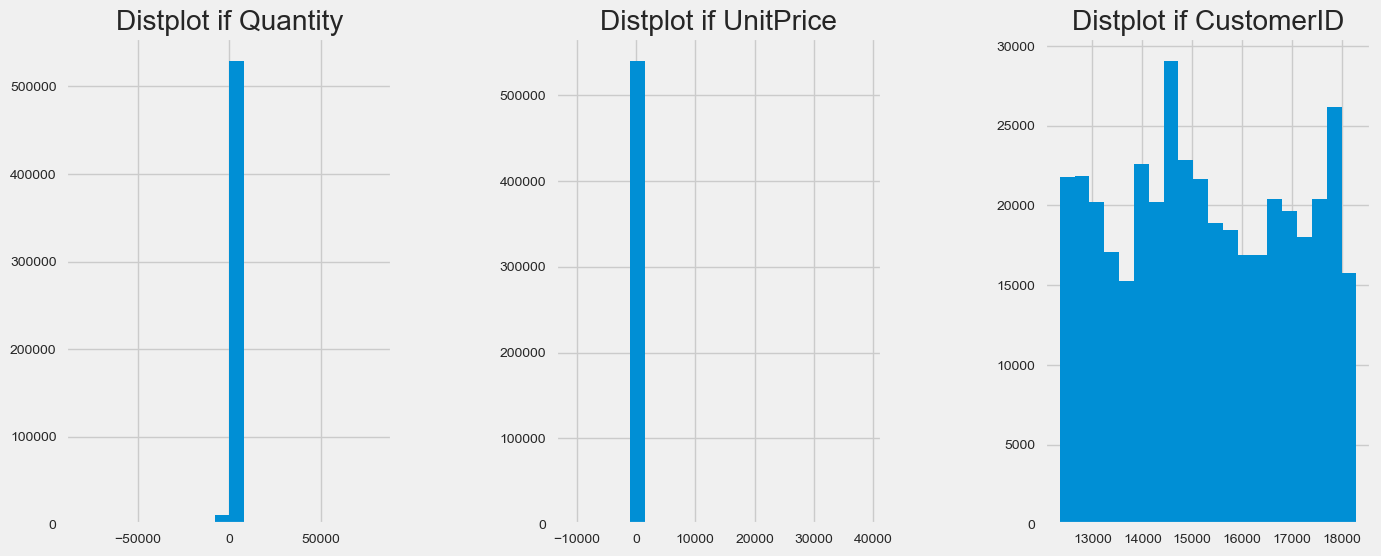

In [40]:
plt.style.use('fivethirtyeight')
plt.figure(1,figsize=(15,6))
n=0
for x in ['Quantity','UnitPrice','CustomerID']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    # Generar el histograma utilizando plt.hist() y mostrarlo en la celda actual
    plt.hist(df[x], bins=20)
    # sns.displot(df[x],bins=20)
    plt.title('Distplot if {}'.format(x))
plt.show()

In [57]:
X= df[["Quantity","UnitPrice"]].copy()
# X.drop(labels=['CustomerID'], axis=1, inplace=True)
# X["Quantity"] = X["Quantity"].apply(lambda x: int(x) if x.isdigit() else None)
X["Quantity"] = X["Quantity"].astype(int)
X["UnitPrice"] = X["UnitPrice"].astype(int)
# X["UnitPrice"] = X["UnitPrice"].apply(lambda x: int(x) if x.isdigit() else int(0))
X1 = preprocessing.normalize(X)

In [58]:
display(X[:5])

,Quantity,UnitPrice
0,6,2
1,6,3
2,8,2
3,6,3
4,6,3


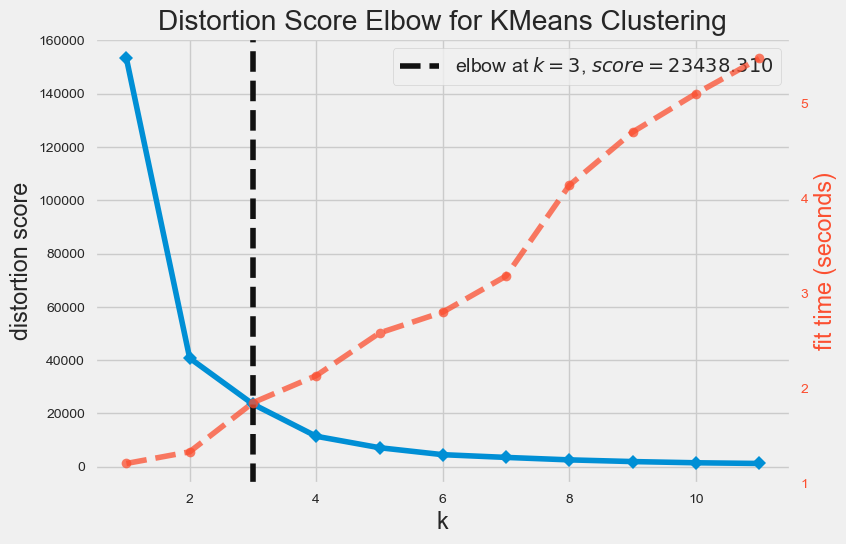

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X1)        # Entrenamos con los datos
visualizer.show()        # Renderizamos la imagen

In [61]:
algorithm = KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
algorithm.fit(X1)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_
df['label'] =  labels

In [67]:
fig = px.scatter_3d(df, x='Gender', y='Quantity', z='UnitPrice',color='label')
fig.show()
# fig.write_html("file.html")